In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV

In [2]:
data=pd.read_csv('Nairobi Office Price Ex.csv')
nominal=['LOC','FUR','WATER','HK_SER']
ordinal=['AMB','PROX_SCH','PROX_ROAD','PROX_MALL']

for feature in ordinal:
  value = data[feature]
  encoder = LabelEncoder()
  trans_f = encoder.fit_transform(value)
  data[feature]=trans_f

data

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,2,0,1,1,yes,yes,32.502345,31.707006
1,madaraka,yes,1,1,1,1,no,no,53.426804,68.777596
2,karen,no,0,0,1,1,yes,yes,61.530358,62.562382
3,karen,yes,1,0,0,0,yes,yes,47.475640,71.546632
4,buruburu,no,1,0,1,1,yes,yes,59.813208,87.230925
5,donholm,no,2,0,0,1,no,yes,55.142188,78.211518
6,langata,no,3,1,1,0,no,yes,52.211797,79.641973
7,langata,yes,2,0,0,1,yes,no,39.299567,59.171489
8,donholm,yes,1,1,0,0,yes,no,48.105042,75.331242
9,karen,yes,2,0,0,0,no,no,52.550014,71.300880


In [3]:
data = pd.concat([pd.get_dummies(data[nominal],prefix='Estate'),data],axis=1) 
data.drop(nominal,axis=1,inplace=True)
data

,Estate_buruburu,Estate_donholm,Estate_karen,Estate_langata,Estate_madaraka,Estate_no,Estate_yes,Estate_no,Estate_yes,Estate_no,Estate_yes,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,SIZE,PRICE
0,0,0,1,0,0,0,1,0,1,0,1,2,0,1,1,32.502345,31.707006
1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,53.426804,68.777596
2,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,61.530358,62.562382
3,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,47.475640,71.546632
4,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,59.813208,87.230925
5,0,1,0,0,0,1,0,1,0,0,1,2,0,0,1,55.142188,78.211518
6,0,0,0,1,0,1,0,1,0,0,1,3,1,1,0,52.211797,79.641973
7,0,0,0,1,0,0,1,0,1,1,0,2,0,0,1,39.299567,59.171489
8,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,48.105042,75.331242
9,0,0,1,0,0,0,1,1,0,1,0,2,0,0,0,52.550014,71.300880


In [4]:
X = data.drop("PRICE",1)
y = data["PRICE"]
regressor=LassoCV()
regressor.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Regressor Coefficients:  [ 0.          0.         -4.34377698  0.         -0.         -0.
  0.         -0.          0.          0.         -0.          2.08572213
  0.         -3.99497824 -0.29801036  1.41027015]
Coefficient col Estate_buruburu    0.000000
Estate_donholm     0.000000
Estate_karen      -4.343777
Estate_langata     0.000000
Estate_madaraka   -0.000000
Estate_no         -0.000000
Estate_yes         0.000000
Estate_no         -0.000000
Estate_yes         0.000000
Estate_no          0.000000
Estate_yes        -0.000000
AMB                2.085722
PROX_SCH           0.000000
PROX_ROAD         -3.994978
PROX_MALL         -0.298010
SIZE               1.410270
dtype: float64
L1 selected only  5  features out of  16  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

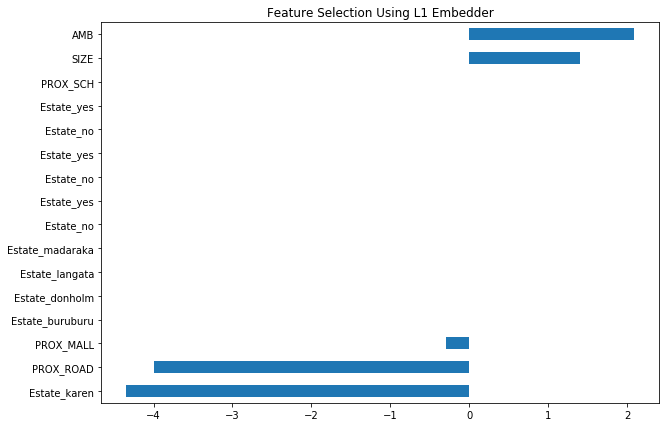

In [5]:
#print('Regressor Coefficients: ', regressor.coef_)
coef_col = pd.Series(regressor.coef_,index=X.columns)
#print('Coefficient col', coef_col)
sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")
no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features

print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")